## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.469431 -0.921763 -1.010828  1.838003  0.532535  0.887883
1 -1.154838 -1.477686  1.041975 -0.432056 -0.419674 -1.061859
2 -1.567724  0.173842 -0.753064  0.594221 -0.220362 -0.838017
3  1.158371  0.036017 -0.105887  0.619259 -0.051392  0.913731
4  0.324599  1.218311  1.407698 -0.518906 -0.139165  1.242774


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0045987	total: 57.3ms	remaining: 57.3s
1:	learn: 0.9956532	total: 57.8ms	remaining: 28.9s
2:	learn: 0.9851133	total: 58.3ms	remaining: 19.4s
3:	learn: 0.9749207	total: 58.7ms	remaining: 14.6s
4:	learn: 0.9647672	total: 59.2ms	remaining: 11.8s
5:	learn: 0.9553293	total: 59.6ms	remaining: 9.88s
6:	learn: 0.9458469	total: 60ms	remaining: 8.52s
7:	learn: 0.9369935	total: 60.6ms	remaining: 7.51s
8:	learn: 0.9287300	total: 61ms	remaining: 6.72s
9:	learn: 0.9200201	total: 61.4ms	remaining: 6.08s
10:	learn: 0.9093456	total: 61.9ms	remaining: 5.57s
11:	learn: 0.8996146	total: 62.5ms	remaining: 5.14s
12:	learn: 0.8897399	total: 63ms	remaining: 4.78s
13:	learn: 0.8809569	total: 63.5ms	remaining: 4.47s
14:	learn: 0.8742112	total: 64ms	remaining: 4.2s
15:	learn: 0.8645960	total: 64.4ms	remaining: 3.96s
16:	learn: 0.8553305	total: 64.8ms	remaining: 3.75s
17:	learn: 0.8478297	total: 65.2ms	remaining: 3.56s
18:	learn: 0.8385835	total: 65.7ms	remaining: 3.39s
1

106:	learn: 0.3813452	total: 107ms	remaining: 894ms
107:	learn: 0.3785314	total: 108ms	remaining: 890ms
108:	learn: 0.3756145	total: 108ms	remaining: 884ms
109:	learn: 0.3728323	total: 109ms	remaining: 878ms
110:	learn: 0.3697800	total: 109ms	remaining: 872ms
111:	learn: 0.3670878	total: 109ms	remaining: 867ms
112:	learn: 0.3648446	total: 110ms	remaining: 861ms
113:	learn: 0.3616701	total: 110ms	remaining: 855ms
114:	learn: 0.3583520	total: 111ms	remaining: 851ms
115:	learn: 0.3554847	total: 111ms	remaining: 846ms
116:	learn: 0.3526496	total: 111ms	remaining: 841ms
117:	learn: 0.3496443	total: 112ms	remaining: 836ms
118:	learn: 0.3471115	total: 112ms	remaining: 831ms
119:	learn: 0.3440026	total: 113ms	remaining: 827ms
120:	learn: 0.3414441	total: 113ms	remaining: 823ms
121:	learn: 0.3389777	total: 114ms	remaining: 819ms
122:	learn: 0.3364246	total: 114ms	remaining: 814ms
123:	learn: 0.3340284	total: 115ms	remaining: 811ms
124:	learn: 0.3311379	total: 115ms	remaining: 807ms
125:	learn: 

276:	learn: 0.1068126	total: 186ms	remaining: 486ms
277:	learn: 0.1061332	total: 187ms	remaining: 485ms
278:	learn: 0.1053931	total: 187ms	remaining: 484ms
279:	learn: 0.1046417	total: 188ms	remaining: 483ms
280:	learn: 0.1040281	total: 188ms	remaining: 482ms
281:	learn: 0.1034083	total: 189ms	remaining: 480ms
282:	learn: 0.1028019	total: 189ms	remaining: 479ms
283:	learn: 0.1020333	total: 189ms	remaining: 478ms
284:	learn: 0.1013223	total: 190ms	remaining: 477ms
285:	learn: 0.1007515	total: 190ms	remaining: 476ms
286:	learn: 0.1002892	total: 191ms	remaining: 475ms
287:	learn: 0.0999275	total: 191ms	remaining: 473ms
288:	learn: 0.0993652	total: 192ms	remaining: 472ms
289:	learn: 0.0986173	total: 192ms	remaining: 471ms
290:	learn: 0.0980888	total: 193ms	remaining: 469ms
291:	learn: 0.0973401	total: 193ms	remaining: 468ms
292:	learn: 0.0968308	total: 194ms	remaining: 467ms
293:	learn: 0.0961863	total: 194ms	remaining: 466ms
294:	learn: 0.0957772	total: 195ms	remaining: 466ms
295:	learn: 

493:	learn: 0.0358629	total: 290ms	remaining: 297ms
494:	learn: 0.0356711	total: 290ms	remaining: 296ms
495:	learn: 0.0355855	total: 291ms	remaining: 296ms
496:	learn: 0.0353107	total: 291ms	remaining: 295ms
497:	learn: 0.0352674	total: 292ms	remaining: 294ms
498:	learn: 0.0350811	total: 292ms	remaining: 293ms
499:	learn: 0.0348138	total: 293ms	remaining: 293ms
500:	learn: 0.0347716	total: 293ms	remaining: 292ms
501:	learn: 0.0346362	total: 294ms	remaining: 291ms
502:	learn: 0.0344044	total: 294ms	remaining: 291ms
503:	learn: 0.0342721	total: 295ms	remaining: 290ms
504:	learn: 0.0340098	total: 295ms	remaining: 289ms
505:	learn: 0.0338824	total: 296ms	remaining: 289ms
506:	learn: 0.0336105	total: 296ms	remaining: 288ms
507:	learn: 0.0334100	total: 297ms	remaining: 287ms
508:	learn: 0.0332436	total: 297ms	remaining: 287ms
509:	learn: 0.0331043	total: 297ms	remaining: 286ms
510:	learn: 0.0328621	total: 298ms	remaining: 285ms
511:	learn: 0.0328237	total: 298ms	remaining: 284ms
512:	learn: 

658:	learn: 0.0191777	total: 369ms	remaining: 191ms
659:	learn: 0.0191188	total: 369ms	remaining: 190ms
660:	learn: 0.0190355	total: 370ms	remaining: 190ms
661:	learn: 0.0190169	total: 370ms	remaining: 189ms
662:	learn: 0.0189382	total: 370ms	remaining: 188ms
663:	learn: 0.0188482	total: 371ms	remaining: 188ms
664:	learn: 0.0187673	total: 371ms	remaining: 187ms
665:	learn: 0.0186593	total: 372ms	remaining: 186ms
666:	learn: 0.0185840	total: 372ms	remaining: 186ms
667:	learn: 0.0185663	total: 373ms	remaining: 185ms
668:	learn: 0.0184793	total: 373ms	remaining: 185ms
669:	learn: 0.0184058	total: 373ms	remaining: 184ms
670:	learn: 0.0183206	total: 374ms	remaining: 183ms
671:	learn: 0.0182488	total: 374ms	remaining: 183ms
672:	learn: 0.0181656	total: 375ms	remaining: 182ms
673:	learn: 0.0180978	total: 375ms	remaining: 181ms
674:	learn: 0.0180313	total: 376ms	remaining: 181ms
675:	learn: 0.0179560	total: 376ms	remaining: 180ms
676:	learn: 0.0178911	total: 377ms	remaining: 180ms
677:	learn: 

880:	learn: 0.0095173	total: 473ms	remaining: 63.8ms
881:	learn: 0.0095092	total: 473ms	remaining: 63.3ms
882:	learn: 0.0094658	total: 474ms	remaining: 62.8ms
883:	learn: 0.0094583	total: 474ms	remaining: 62.2ms
884:	learn: 0.0094376	total: 475ms	remaining: 61.7ms
885:	learn: 0.0094203	total: 475ms	remaining: 61.1ms
886:	learn: 0.0093936	total: 476ms	remaining: 60.6ms
887:	learn: 0.0093862	total: 476ms	remaining: 60ms
888:	learn: 0.0093439	total: 476ms	remaining: 59.5ms
889:	learn: 0.0093273	total: 477ms	remaining: 59ms
890:	learn: 0.0093209	total: 477ms	remaining: 58.4ms
891:	learn: 0.0093046	total: 478ms	remaining: 57.8ms
892:	learn: 0.0092885	total: 478ms	remaining: 57.3ms
893:	learn: 0.0092793	total: 479ms	remaining: 56.8ms
894:	learn: 0.0092380	total: 479ms	remaining: 56.2ms
895:	learn: 0.0092183	total: 480ms	remaining: 55.7ms
896:	learn: 0.0092025	total: 480ms	remaining: 55.1ms
897:	learn: 0.0091574	total: 481ms	remaining: 54.6ms
898:	learn: 0.0091378	total: 481ms	remaining: 54ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

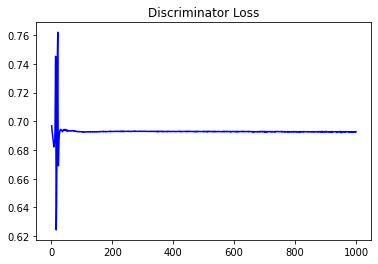

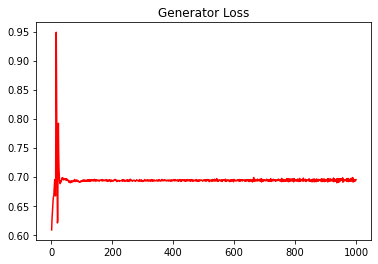

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.12998193948611064


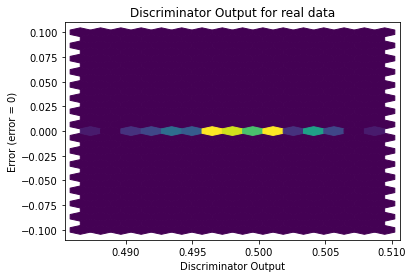

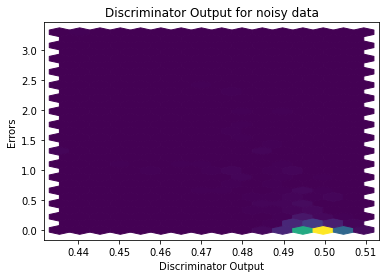

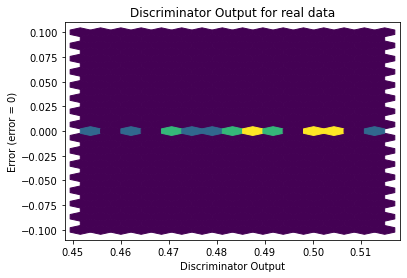

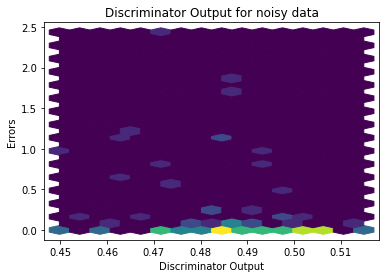

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


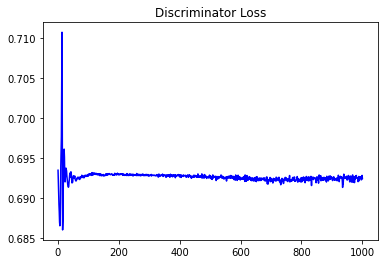

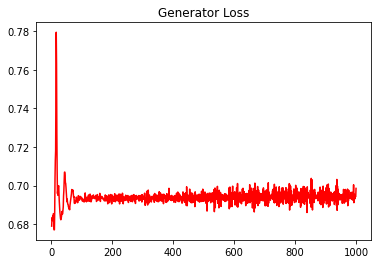

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07736316544237572


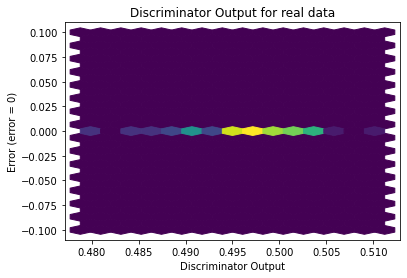

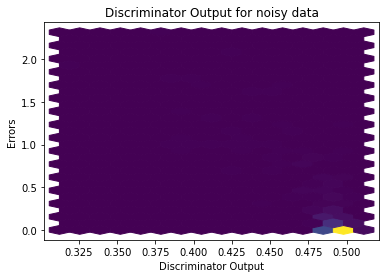

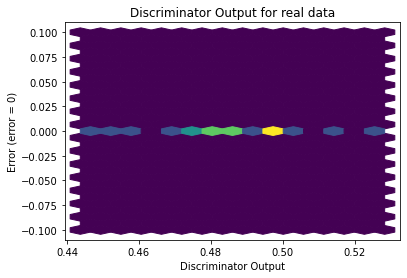

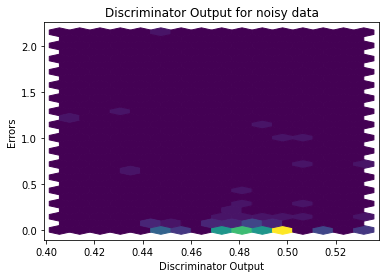

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5442]], requires_grad=True)
